<a href="https://colab.research.google.com/github/akshaypt7/amazon_sales_prediction/blob/main/project_01_05_visualizing_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 188 kB 17.3 MB/s 
     |████████████████████████████████| 1.2 MB 19.5 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 51 kB 281 kB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *
# from kaggle import api
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
# from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [4]:
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers import Dense, Flatten, Dropout, Input, Embedding, Reshape
from keras.layers import concatenate
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import pickle
import csv
from datetime import datetime
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

from sklearn.model_selection import train_test_split
import math
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

What we could do here is visualize the entity embedding, we might not able to gather anything huge, but somethings like Asin_embedding and hour embedding might give us some info. And also this is something I can use somewhere else too.


The beauty of embedding is it is so beautiful, some numbers which starts as an assumption or random creates a meaning btw the numbers is awesome, which means it might be able to show relations that maybe we miss. 

This is definitely that can be beautiful to see how its going to happen, even though I am a bit lacking in clarity on how to proceed with doing this. 

The reason is whenever I looked at certain codes, everything seems confusing to me. but that is the fun of this from confusion of where to work we focused of visualizing the embeddings, and from there it might be again a confusing road but i think that is okay, rather than trying to visualize lets break down and see what is going to happen. 

We can put out a theory which can help us on how to proceed.


the theory is , we take one embedding like asin_embedding this will have a rows of list of numbers, say 10 columns of list, with as many rows as the number of, but we have given embeddings not the same size of unique asins?, should we give the size of the same , but i didnt observed that anywhere else, but if we have not given the same size, what will they represent, the chance is they would represent, maybe like groups of asin, but then how would you know which asins are which. but i think one of the input we have given is unique asin number, so there would be some data which represents that, and we can use that.



Using Diffused thinking, which I should do more often which gives more clarity and a break to our mind, what i found out is two things

1) that we will have unqiue number of list(embeddings), each embeddings is a list of numbers and this number of embeddings = number of unique asins. And then we use PCA analysis to understand what it is. exciting news is we will also learn about PCA.

2) we can try this embedding in fastai version of the learner, when we create our own module, i think it wont be that confusing, and it is simple(not easy), where we create a class from module, and it that we pass in the embedding details and also at the end, we can get this by calling something like learner.embs etc..





about learning diffused








One thing we can try later as well is using embeddings of fastai, use the collab chapter one, there there is only two variables, they have considered it both cat variables.

#### Lets look at the embeddings in detail and understand its attributes

In [21]:
infile = open('/content/gdrive/MyDrive/bluebook/df_main.pkl','rb')
df_main = pickle.load(infile)

In [6]:
df_main = add_datepart(df_main,'date')

In [7]:
condition = (df_main.Year < 2020) | (df_main.Month < 8)
train_idx = np.where(condition)[0]
valid_idx = np.where(~condition)[0]

In [8]:
cat = ['Asin',
 'Is_month_end',
 'Is_month_start',
 'Is_quarter_end',
 'Is_quarter_start',
 'Is_year_end',
 'Is_year_start',
 'hour','Month','Week', 'Day','Dayofweek','Dayofyear']

In [9]:
enc = OrdinalEncoder()
enc.fit(df_main[cat])
df_main[cat]= enc.transform(df_main[cat])

In [10]:
X =df_main.drop(['Quantity'],axis=1)

In [11]:
saved_embeddings_fname = '/content/gdrive/MyDrive/bluebook/embeddings.pickle'

In [12]:
def embed_features(X, saved_embeddings_fname):
    f_embeddings = open(saved_embeddings_fname, "rb")
    embeddings = pickle.load(f_embeddings)

    index_embedding_mapping = {0: 0, 3: 1, 9: 2, 6: 3, 8: 4, 7: 5}
    X_embedded = []

    (num_records, num_features) = X.shape
    for record in X: 
        embedded_features = []
        for i, feat in enumerate(record):
            feat = int(feat)
            if i not in index_embedding_mapping.keys():
                embedded_features += [feat]
            else:
                embedding_index = index_embedding_mapping[i]
                embedded_features += embeddings[embedding_index][feat].tolist()

        X_embedded.append(embedded_features)

    return np.array(X_embedded)

In [13]:
X_emb = embed_features(X.values,saved_embeddings_fname)

In [14]:
X_train = list(itemgetter(*train_idx)(X_emb)) 
X_valid = list(itemgetter(*valid_idx)(X_emb)) 

# or we can use list comprehension too for ex, test = [X_emb[i] for i in train_idx ]

In [15]:

y_train = df_main['Quantity'].iloc[train_idx]

y_valid = df_main['Quantity'].iloc[valid_idx]

In [16]:
X_emb.shape

(10946, 47)

In [ ]:
array(X_train).shape

(7517, 47)

In [ ]:
df_main.shape

(10946, 19)

In [ ]:
47-19

28

The difference in column sizes can be attributed of X_embed and df_main , to the embedding sizes of 6 columns which is 6+4+3+7+5+10 =35, this 35 new columns minus 6 columns of which we applied embedding and 1 column of quanity gives us the extra 28 columns

In [ ]:
X_emb[0].shape

(47,)

In [17]:
f_embeddings = open(saved_embeddings_fname, "rb")
embeddings = pickle.load(f_embeddings)

In [ ]:
array(embeddings).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(6,)

In [ ]:
array(embeddings[0]).shape #Asin

(46, 6)

When we look at the saved embeddings what we notice is that, espiecally the shapes of the embedding, there are 6. This 6 are the embeddings we created for the 6 categories.

When we look inside each of the 6 embedding what we can see is that, each embedding has the shape specified by us in the begining, for example, unique Asins and the number of ouput we specified. 

Now what happened in the function above is that we replace for example asin one, with the values in the embedding[0] (which is asin) and within that the asin one, will be a list of numbers of size we defined earlier. In the asin case it is 46.

In [ ]:
embeddings[0][0] # for example this is the list we can use to replace the asin one

array([ 0.01826725,  0.03898218, -0.01056361,  0.02101258, -0.0374638 , -0.04034017], dtype=float32)

In papers code they have given github links for projects they have used entity embeddings, this is one such project, which we can refer to create viz for embeddings.-https://github.com/entron/entity-embedding-rossmann/blob/master/plot_embeddings.ipynb

#### Entity Embedding Visualization

In [19]:
embeddings[0].shape # For asin

(46, 6)

We need to know the order in which the embeddings are created, because we have 46 asins and 46 embeddings for these asins, assuming that embeddings are in the same order as that for unique we are proceeding. We will come back to this later.

In [20]:
df_main['Asin'].unique()

array([ 1.,  7., 27., 21., 22., 23.,  6., 24., 25., 26., 28.,  8.,  3., 14.,  5., 11., 13., 30., 32., 33., 29., 31., 38., 17., 19., 35., 34., 37., 36., 18., 20., 39., 42., 40., 43., 44., 41., 45.,
        4.,  2., 15., 16.,  9., 10.,  0., 12.])

In [25]:
df_main['Asin'].unique()

array(['B07KYFHTGF', 'B07TM3LRVB', 'B08976V1BZ', 'B08332221J', 'B0849NLNTQ', 'B084JJWJ31', 'B07TJ1HDTM', 'B0858X26QM', 'B0859193NJ', 'B0859B5J8T', 'B0897LPBHR', 'B07W1YYQ9G', 'B07MK32L49',
       'B07ZBCTB9N', 'B07S8NC532', 'B07YC69QKT', 'B07Z7QX6ST', 'B08Y6L3QDG', 'B08Y6N8ZSJ', 'B08Y6PGH7S', 'B08Y6K9FCX', 'B08Y6L69M2', 'B08ZDFSC56', 'B07ZVX96TY', 'B07ZVYKYNZ', 'B08ZDC735Z',
       'B08ZCP8DBS', 'B08ZDDJLMB', 'B08ZDCSBC9', 'B07ZVXZNVD', 'B081S1V3MQ', 'B0957WJB9N', 'B096K5FMKQ', 'B096FHQXT5', 'B096K61TPQ', 'B0972MS2X7', 'B096FJ31NK', 'B097BRX6ZY', 'B07MQT276Q',
       'B07MGH1T39', 'B07ZQKDR9F', 'B07ZRBV7NW', 'B07X543RP7', 'B07Y237BXQ', 'B00S0PEI64', 'B07YQ3PV5H'], dtype=object)

In [26]:
import pickle
from sklearn import manifold
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
Asin_names = df_main['Asin'].unique()

In [27]:
asin_embedding = embeddings[0]

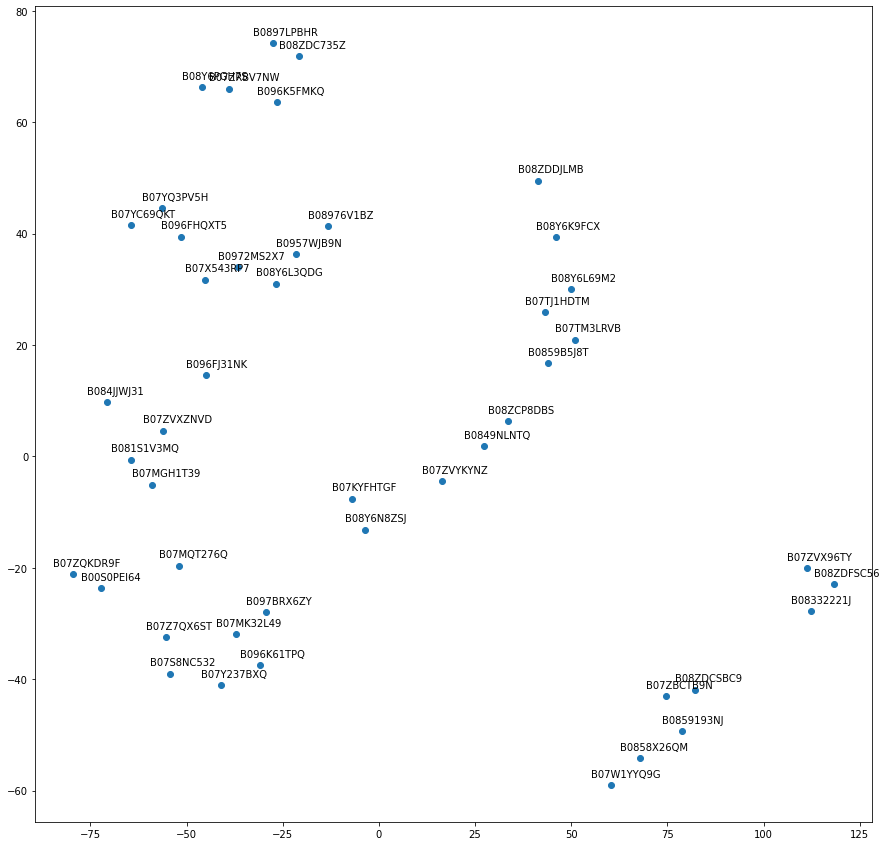

In [29]:


tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=5, learning_rate=100)
Y = tsne.fit_transform(asin_embedding)
plt.figure(figsize=(15,15))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(Asin_names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-20, 8), textcoords = 'offset points')
plt.savefig('asin_embedding.pdf')



In [30]:
df_main['Asin'].unique()

array(['B07KYFHTGF', 'B07TM3LRVB', 'B08976V1BZ', 'B08332221J', 'B0849NLNTQ', 'B084JJWJ31', 'B07TJ1HDTM', 'B0858X26QM', 'B0859193NJ', 'B0859B5J8T', 'B0897LPBHR', 'B07W1YYQ9G', 'B07MK32L49',
       'B07ZBCTB9N', 'B07S8NC532', 'B07YC69QKT', 'B07Z7QX6ST', 'B08Y6L3QDG', 'B08Y6N8ZSJ', 'B08Y6PGH7S', 'B08Y6K9FCX', 'B08Y6L69M2', 'B08ZDFSC56', 'B07ZVX96TY', 'B07ZVYKYNZ', 'B08ZDC735Z',
       'B08ZCP8DBS', 'B08ZDDJLMB', 'B08ZDCSBC9', 'B07ZVXZNVD', 'B081S1V3MQ', 'B0957WJB9N', 'B096K5FMKQ', 'B096FHQXT5', 'B096K61TPQ', 'B0972MS2X7', 'B096FJ31NK', 'B097BRX6ZY', 'B07MQT276Q',
       'B07MGH1T39', 'B07ZQKDR9F', 'B07ZRBV7NW', 'B07X543RP7', 'B07Y237BXQ', 'B00S0PEI64', 'B07YQ3PV5H'], dtype=object)

In [ ]:
B08332221J - Shower head filter
B08ZDFSC56 - Nemora Dec light-05
B07ZVX96TY - Wooden frame

B0897LPBHR - 10STAGE
B08ZDC735Z - Wooden light

#### Hour

In [33]:
hours = df_main['hour'].unique()
hours

array([12., 20., 22., 10.,  0., 17., 13., 14., 16., 18., 11., 21.,  9.,  7.,  2., 15., 23., 19.,  8.,  3.,  6.,  1.,  4.,  5.])

In [36]:
hour_embedding = embeddings[1]

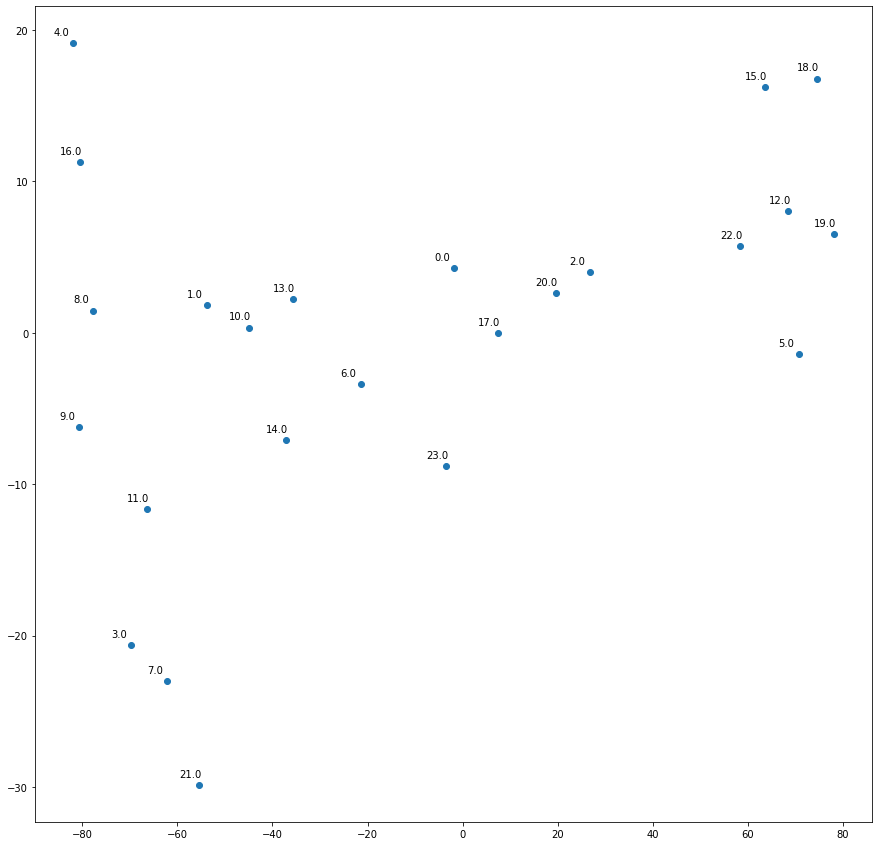

In [37]:


tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=5, learning_rate=100)
Y = tsne.fit_transform(hour_embedding)
plt.figure(figsize=(15,15))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(hours):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-20, 8), textcoords = 'offset points')
plt.savefig('hours.pdf')

